In [17]:
import altair as alt
import numpy as np
import pandas as pd

from set_up_grasp_models.check_models.thermodynamics_checks import check_thermodynamic_feasibility

# comment the following line if you're using jupyter lab, uncomment if you're using jupyter notebook
#alt.renderers.enable('notebook')

In [18]:
file_in = '/home/mrama/GRASP_test/GRASP/input_test/HMP2360_r0_t3_new.xlsx'
data_dict = pd.read_excel(file_in, sheet_name=None)

# Get flux and Gibbs energies info from check_thermodynamic_feasibility
flag, flux_df, dG_df = check_thermodynamic_feasibility(data_dict) 

# Modify dataframes
dG_df['rxn'] = dG_df.index

flux_df['rxn'] = flux_df.index
flux_df['flux_min'] = flux_df['MBo10_mean'] - flux_df['MBo10_std']
flux_df['flux_max'] = flux_df['MBo10_mean'] + flux_df['MBo10_std']
flux_df['flux'] = flux_df['MBo10_mean']


Checking if fluxes and Gibbs energies are compatible.

Everything seems to be OK.


In [19]:
def plot_dG_and_flux(dG_df, flux_df, height=400, width=600):
    threshold_df = pd.DataFrame([{"ThresholdValue": 0, "Threshold": "hazardous"}])
    
    rect_dG = alt.Chart(dG_df).mark_rect().encode(
        y ='rxn:N',
        x='∆G_min',
        x2='∆G_max'
    ).properties(
        height=height,
        width=width
    )

    point_dG = alt.Chart(dG_df).mark_point(size=100, color='red', filled=True).encode(
        y ='rxn:N',
        x='∆G_mean',
        tooltip=['rxn', '∆G_min', '∆G_mean', '∆G_max']
    ).interactive()


    rule_dG = alt.Chart(threshold_df).mark_rule().encode(
        x='ThresholdValue:Q'
    )


    rect_flux = alt.Chart(flux_df).mark_rect().encode(
        y ='rxn:N',
        x='flux_min:Q',
        x2='flux_max:Q'
    ).properties(
        height=height,
        width=width
    )

    point_flux = alt.Chart(flux_df).mark_point(size=100, color='red', filled=True).encode(
        y ='rxn:N',
        x='flux',
        tooltip=['rxn', 'flux_min', 'flux', 'flux_max']
    ).interactive()


    rule_flux = alt.Chart(threshold_df).mark_rule().encode(
        x='ThresholdValue:Q'
    )

    return alt.hconcat(rect_dG + point_dG + rule_dG, rect_flux + point_flux + rule_flux)

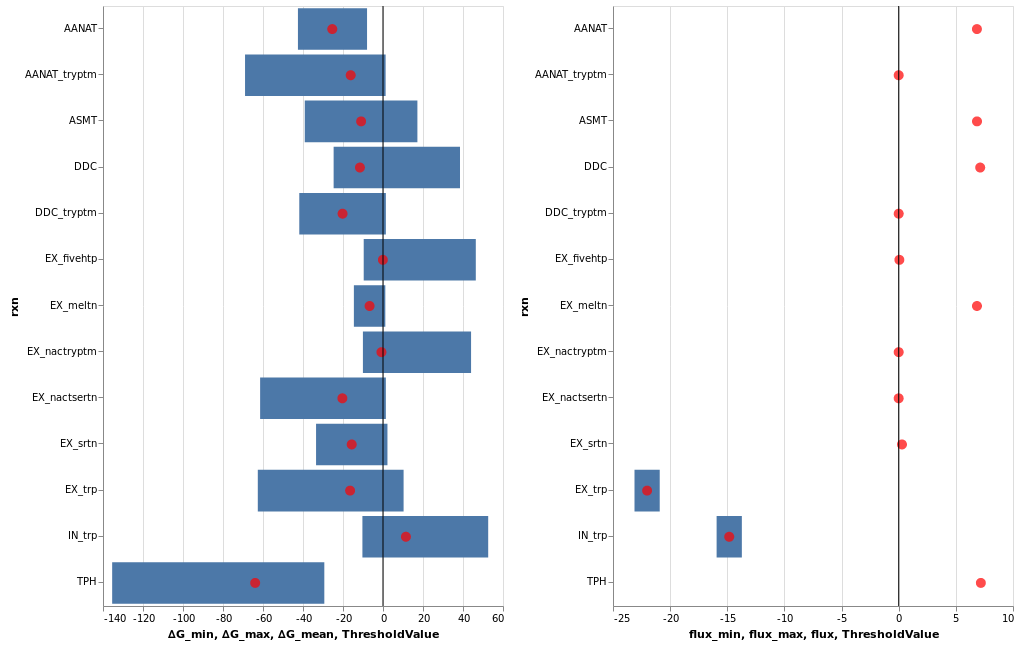

In [20]:
height=600
width=400
plot_dG_and_flux(dG_df,  flux_df, height, width)